In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tautira
Processing Record 2 of Set 1 | kruisfontein
Processing Record 3 of Set 1 | floro
Processing Record 4 of Set 1 | mabai
Processing Record 5 of Set 1 | ovalle
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | vilyuysk
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | myrtle beach
Processing Record 16 of Set 1 | manono
Processing Record 17 of Set 1 | bulgan
Processing Record 18 of Set 1 | peterhead
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | tual
Processing Record 21 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 22 of Set 1 | coquimbo
Processing Recor

Processing Record 40 of Set 4 | asau
Processing Record 41 of Set 4 | berberati
Processing Record 42 of Set 4 | pachino
Processing Record 43 of Set 4 | arlit
Processing Record 44 of Set 4 | pizarro
Processing Record 45 of Set 4 | puerto del rosario
Processing Record 46 of Set 4 | tomatlan
Processing Record 47 of Set 4 | ahipara
Processing Record 48 of Set 4 | maghama
City not found. Skipping...
Processing Record 49 of Set 4 | nyurba
Processing Record 50 of Set 4 | hambantota
Processing Record 1 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 5 | nantucket
Processing Record 3 of Set 5 | namibe
Processing Record 4 of Set 5 | narsaq
Processing Record 5 of Set 5 | coxim
Processing Record 6 of Set 5 | methoni
Processing Record 7 of Set 5 | bassar
Processing Record 8 of Set 5 | luderitz
Processing Record 9 of Set 5 | chara
Processing Record 10 of Set 5 | villa sandino
Processing Record 11 of Set 5 | waddan
Processing Record 12 of Set 5 | kaitangata
Processing Rec

Processing Record 30 of Set 8 | treinta y tres
Processing Record 31 of Set 8 | aykhal
Processing Record 32 of Set 8 | balkanabat
Processing Record 33 of Set 8 | muravlenko
Processing Record 34 of Set 8 | abu samrah
Processing Record 35 of Set 8 | eugene
Processing Record 36 of Set 8 | itacoatiara
Processing Record 37 of Set 8 | katsuura
Processing Record 38 of Set 8 | liwale
Processing Record 39 of Set 8 | oksfjord
Processing Record 40 of Set 8 | meulaboh
Processing Record 41 of Set 8 | hakkari
Processing Record 42 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 43 of Set 8 | mwinilunga
Processing Record 44 of Set 8 | college
Processing Record 45 of Set 8 | hutchinson
Processing Record 46 of Set 8 | puerto escondido
Processing Record 47 of Set 8 | minab
Processing Record 48 of Set 8 | hovd
Processing Record 49 of Set 8 | toliary
City not found. Skipping...
Processing Record 50 of Set 8 | dolgoderevenskoye
Processing Record 1 of Set 9 | taoudenni
Processing Record 2 o

Processing Record 19 of Set 12 | iracoubo
Processing Record 20 of Set 12 | pouebo
Processing Record 21 of Set 12 | ambovombe
Processing Record 22 of Set 12 | danilovka
Processing Record 23 of Set 12 | lasa
Processing Record 24 of Set 12 | florence
Processing Record 25 of Set 12 | toktogul
Processing Record 26 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 27 of Set 12 | turkistan
Processing Record 28 of Set 12 | auki
Processing Record 29 of Set 12 | matai
Processing Record 30 of Set 12 | bacolod
Processing Record 31 of Set 12 | kralendijk
Processing Record 32 of Set 12 | jalna
Processing Record 33 of Set 12 | sabha
Processing Record 34 of Set 12 | ambon
Processing Record 35 of Set 12 | gorokhovets
Processing Record 36 of Set 12 | sorland
Processing Record 37 of Set 12 | annonay
Processing Record 38 of Set 12 | adamovka
Processing Record 39 of Set 12 | pangnirtung
Processing Record 40 of Set 12 | grand-lahou
Processing Record 41 of Set 12 | amazar
Processing Record 

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tautira,-17.7333,-149.1500,87.80,66,20,9.22,PF,2021-03-14 22:37:07
1,Kruisfontein,-34.0033,24.7314,68.00,97,100,1.99,ZA,2021-03-14 22:37:08
2,Floro,61.5996,5.0328,39.20,56,0,3.44,NO,2021-03-14 22:37:09
3,Mabai,23.0128,104.4508,57.49,96,85,4.83,CN,2021-03-14 22:37:09
4,Ovalle,-30.5983,-71.2003,68.22,56,0,5.21,CL,2021-03-14 22:37:10
5,Puerto Ayora,-0.7393,-90.3518,82.40,74,40,9.22,EC,2021-03-14 22:37:10
6,Vilyuysk,63.7553,121.6247,-7.78,94,58,8.41,RU,2021-03-14 22:37:11
7,Mataura,-46.1927,168.8643,57.07,77,100,6.04,NZ,2021-03-14 22:35:56
8,Kapaa,22.0752,-159.3190,73.40,78,75,23.02,US,2021-03-14 22:37:12
9,Barrow,71.2906,-156.7887,-5.80,77,1,14.97,US,2021-03-14 22:36:00


In [7]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tautira,PF,2021-03-14 22:37:07,-17.7333,-149.1500,87.80,66,20,9.22
1,Kruisfontein,ZA,2021-03-14 22:37:08,-34.0033,24.7314,68.00,97,100,1.99
2,Floro,NO,2021-03-14 22:37:09,61.5996,5.0328,39.20,56,0,3.44
3,Mabai,CN,2021-03-14 22:37:09,23.0128,104.4508,57.49,96,85,4.83
4,Ovalle,CL,2021-03-14 22:37:10,-30.5983,-71.2003,68.22,56,0,5.21
...,...,...,...,...,...,...,...,...,...
581,Acajutla,SV,2021-03-14 22:39:02,13.5928,-89.8275,91.40,31,20,8.05
582,Erenhot,CN,2021-03-14 22:37:25,43.6475,111.9767,19.02,21,0,20.24
583,Idanre,NG,2021-03-14 22:41:41,7.1127,5.1159,74.89,86,100,4.90
584,Thinadhoo,MV,2021-03-14 22:41:01,0.5333,72.9333,83.48,69,96,4.56


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

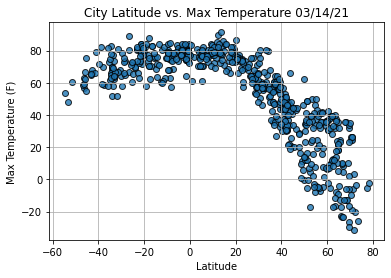

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

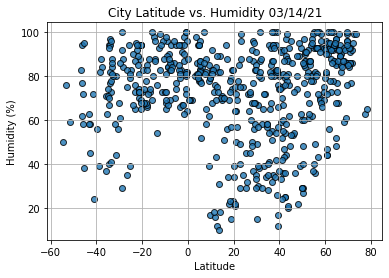

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

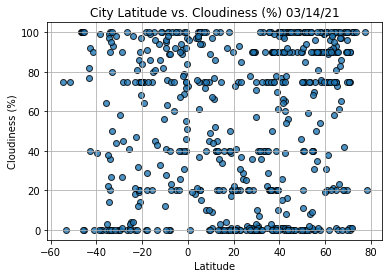

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

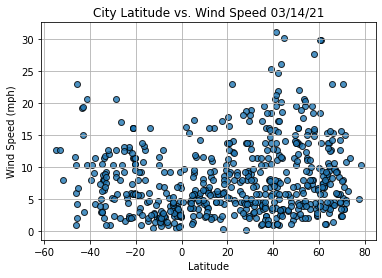

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [14]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2021-03-14 22:34:57
Lat                       42.6001
Lng                      -73.9662
Max Temp                    30.99
Humidity                       25
Cloudiness                     65
Wind Speed                   5.01
Name: 13, dtype: object

In [16]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Floro,NO,2021-03-14 22:37:09,61.5996,5.0328,39.20,56,0,3.44
3,Mabai,CN,2021-03-14 22:37:09,23.0128,104.4508,57.49,96,85,4.83
6,Vilyuysk,RU,2021-03-14 22:37:11,63.7553,121.6247,-7.78,94,58,8.41
8,Kapaa,US,2021-03-14 22:37:12,22.0752,-159.3190,73.40,78,75,23.02
9,Barrow,US,2021-03-14 22:36:00,71.2906,-156.7887,-5.80,77,1,14.97


In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

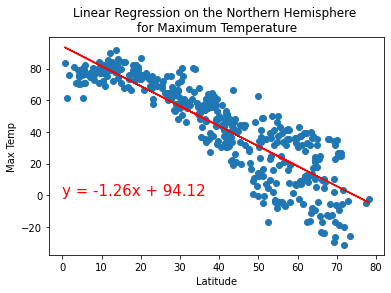

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Linear Regression on the Northern Hemisphere \nfor Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,0))

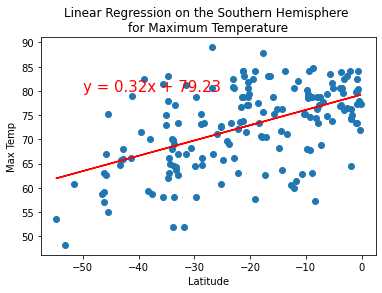

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Linear Regression on the Southern Hemisphere \nfor Maximum Temperature")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

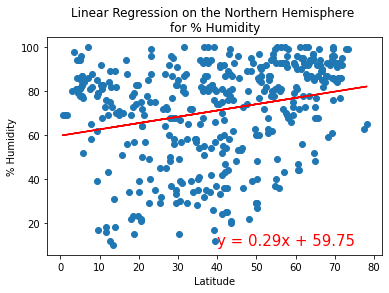

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title("Linear Regression on the Northern Hemisphere \nfor % Humidity")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

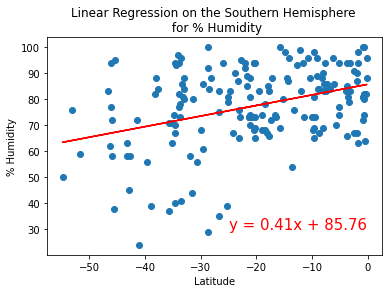

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title("Linear Regression on the Southern Hemisphere \n for % Humidity")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,30))

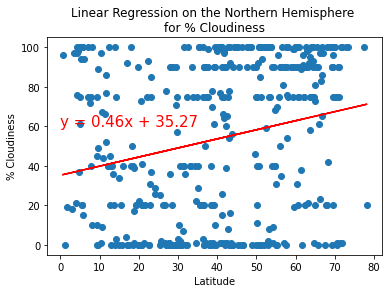

In [36]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title("Linear Regression on the Northern Hemisphere \nfor % Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(0,60))

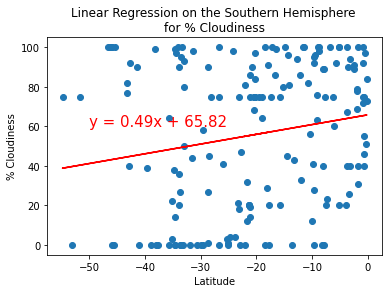

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title("Linear Regression on the Southern Hemisphere \nfor % Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

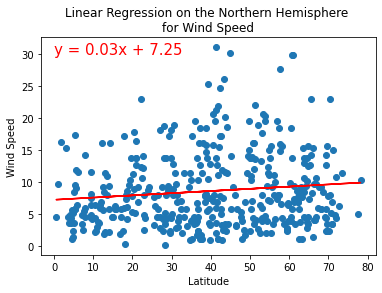

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Northern Hemisphere \nfor Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(0,30))

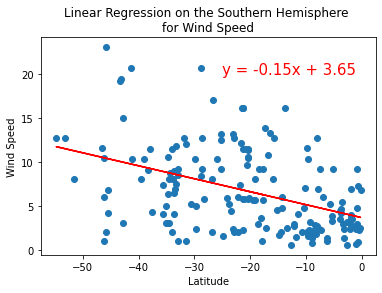

In [45]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Southern Hemisphere \nfor Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-25,20))